# 例
（三硬币模型）假设有3枚硬币，分别记作A,B,C。这些硬币正面出现的概率分别是π，p和q。进行如下掷硬币实验：先掷硬币A，根据其结果选出硬币B或硬币C，正面选硬币B，反面选硬币C；然后掷选出的硬币，掷硬币的结果，出现正面记作1，出现反面记作0；独立地重复n次试验（这里，n=10），观测结果如下：
            1,1,0,1,0,0,1,0,1,1
假设只能观测到掷硬币的结果，不能观测掷硬币的过程。问如何估计三硬币正面出现的概率，即三硬币模型的参数。

解  三硬币模型可以写作
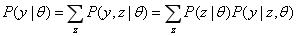

这里，随机变量y是观测变量，表示一次试验观测的结果是1或0；随机变量z是隐变量，表示未观测到的掷硬币A的结果；θ=(π,p,q)是模型参数。这一模型是以上数据的生成模型。注意，随机变量y的数据可以观测，随机变量z的数据不可观测。

将观测数据表示为

未观测数据表示为

则观测数据的似然函数为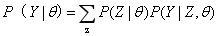

即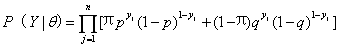

考虑求模型参数θ=(π,p,q)的极大似然估计，即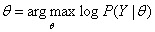

这个问题没有解析解，只有通过迭代的方法求解。EM算法就是可以用于求解这个问题的一种迭代算法。

EM算法首先选取参数的初值，记作然后通过下面的步骤迭代计算参数的估计值，直至收敛为止。第i次迭代参数的估计值为

EM算法的第i+1次迭代如下。

E步：计算在模型参数π(i),p(i),q(i)下观测数据yj来自掷硬币B的概率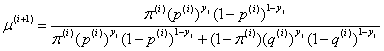

M步：计算模型参数的新估计值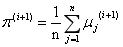

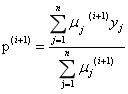

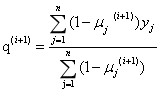

In [3]:
import math
import numpy as np

In [4]:
class EM:
    def __init__(self,prob):
        self.prob_A,self.prob_B,self.prob_C=prob
        self.u=None
        self.epsilon=1e-5

    def fit(self,datas,iterations=3):
        oldProbs = np.zeros((3, 1))
        newProbs = np.zeros((3, 1))
        while True:
            print("probs:",self.prob_A,self.prob_B,self.prob_C)
            oldProbs[:,0]=self.prob_A,self.prob_B,self.prob_C
            self.E_step(datas)
            prob_A, prob_B, prob_C=self.M_step(datas)
            newProbs[:,0]=prob_A, prob_B, prob_C
            if np.linalg.norm(newProbs-oldProbs)<self.epsilon:
                break
            self.prob_A=prob_A
            self.prob_B=prob_B
            self.prob_C=prob_C

        print("fit complete")


    def E_step(self,datas):
        u=[]
        for data in datas:
            tmp1=self.prob_A*math.pow(self.prob_B,data)*math.pow((1-self.prob_B),(1-data))
            tmp2=(1-self.prob_A)*math.pow(self.prob_C,data)*math.pow((1-self.prob_C),(1-data))
            u.append(tmp1/(tmp1+tmp2))
        self.u=u

    def M_step(self,datas):
        n=len(datas)
        prob_A=1/n*sum(self.u)
        prob_B=sum([self.u[j]*datas[j] for j in range(len(datas))])/sum(self.u)
        prob_C=sum([(1-self.u[j])*datas[j] for j in range(len(datas))])/sum([1-u for u in self.u])
        return prob_A,prob_B,prob_C



In [5]:
datas=[1,1,0,1,0,0,1,0,1,1]
init_prob=[0.5,0.5,0.5]
em=EM(init_prob)
em.fit(datas)

probs: 0.5 0.5 0.5
probs: 0.5 0.6 0.6
fit complete


In [6]:
init_prob=[0.4,0.6,0.7]
em=EM(init_prob)
em.fit(datas)

probs: 0.4 0.6 0.7
probs: 0.4064171122994653 0.5368421052631579 0.6432432432432431
fit complete
